# Qualitätsüberprüfung der Messergebnisse

Von: Felix Schulze Sindern

Dieses Notebook ist Grundlage für das Kapitel 3.4 "Qualitätsüberprüfung der Messergebnisse (Felix Schulze Sindern)".

In [590]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [591]:
data = pd.read_csv('../quality_check_measurements.csv')
data = data.drop(columns=['runName']).transpose()
data

,0
0,1863
1,945
2,615
3,956
4,721
...,...
95,702
96,813
97,873
98,713


## 01: Boxplot und Lageparameter

In [592]:
data1 = data.copy()

In [593]:
# Lageparameter sind hier zu entnehmen
data1.describe()

,0
count,100.000000
mean,734.380000
std,147.654236
min,580.000000
25%,655.500000
50%,713.000000
75%,769.750000
max,1863.000000


durchschnittliche Laufzeit (ms)


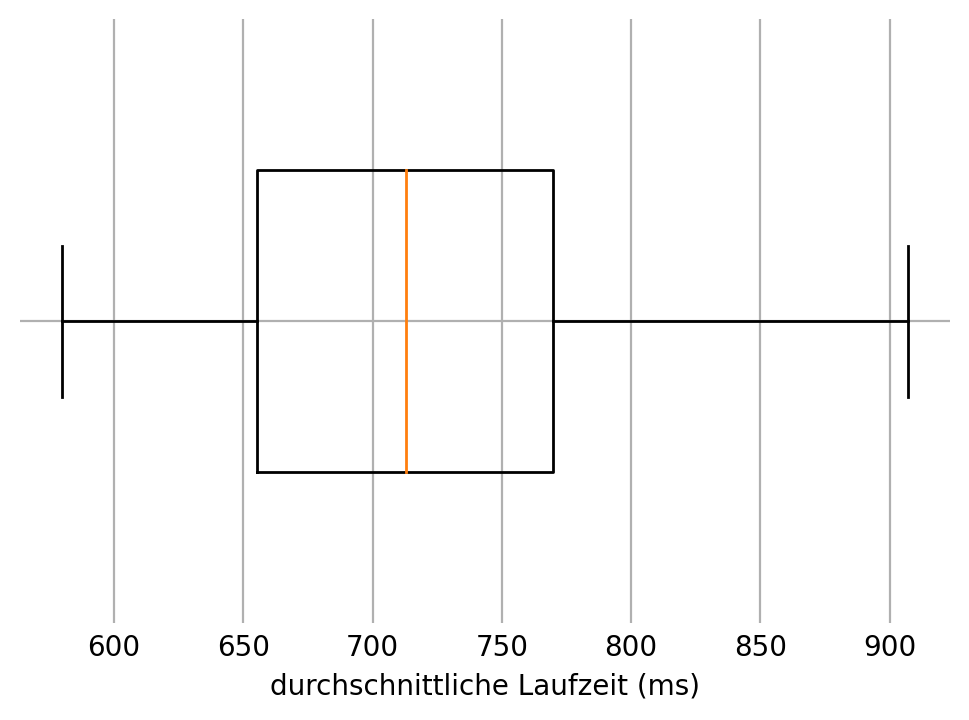

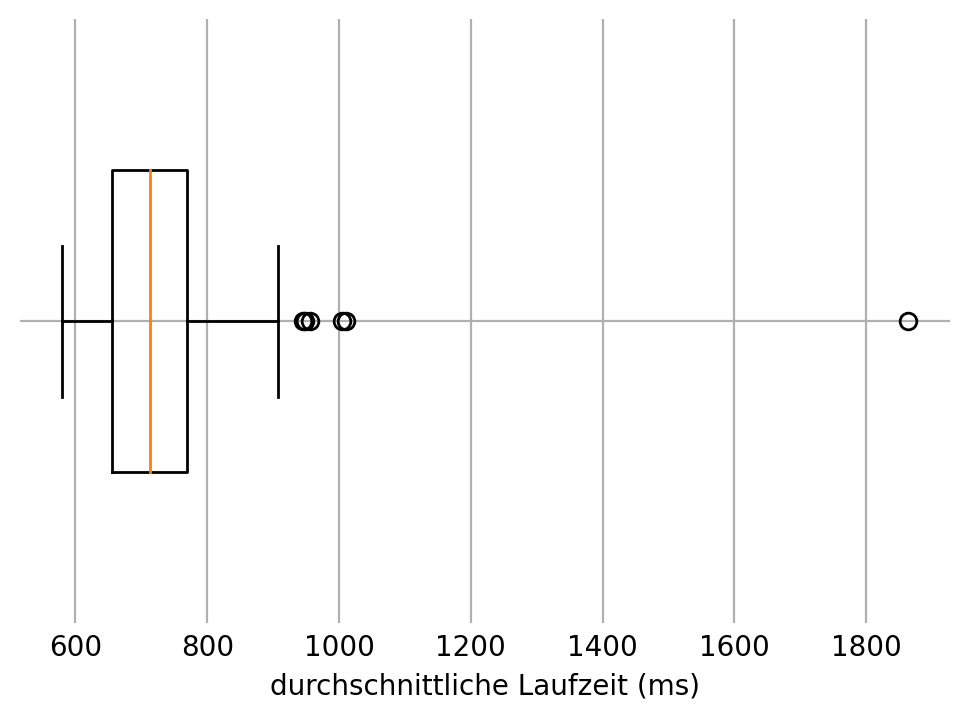

In [594]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=200)

# TODO: gucken wie extrem die ausreißer sind bei showfliers -> Eigendlich ganz sinnvoll
boxplot = ax.boxplot(data1, notch=False, showfliers=False, patch_artist=False, vert=False ,widths=0.5, labels=[""])
boxplot_with_fliers = ax1.boxplot(data1, notch=False, showfliers=True, patch_artist=False, vert=False ,widths=0.5, labels=[""])

ax.set(xlabel='durchschnittliche Laufzeit (ms)')
ax1.set(xlabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()
ax1.grid()

for spine in ax.spines.values():
    spine.set_visible(False)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)
ax1.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig('quality_check_boxplot_with_fliers.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## 02: Daten auf Normalverteilung überprüfen

In [595]:
data2 = data.copy()

### 02.1 Ausreißer entfernen

In [596]:
print(len(data2))
data3 = data2.copy()
data3 = data3.sort_values(0)
# data3[0] = data3[0] - min(data3[0])


quantile_threshold = 0.01
minimum_threshold, maximum_threshold = (data3.quantile(quantile_threshold).tolist()[0], data3.quantile(1 - quantile_threshold).tolist()[0])
print(minimum_threshold, maximum_threshold)

data3 = data3.loc[data3[0] > minimum_threshold]
data3 = data3.loc[data3[0] < maximum_threshold]

print(len(data3))


100
581.98 1019.5200000000043
98


### 2.2 Histogramm erstellen

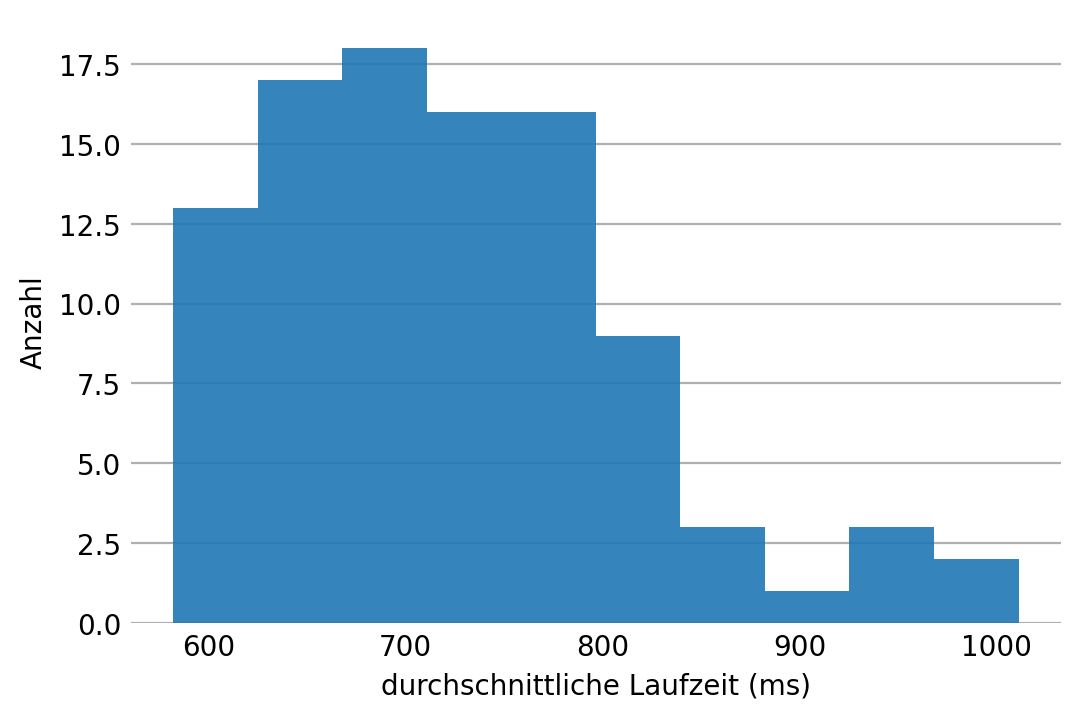

In [597]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.hist(data3, zorder=100, alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Anzahl')

ax.tick_params(length=0)
ax.grid(axis='y', zorder=1)
for spine in ax.spines.values():
    spine.set_visible(False)

fig.savefig('quality_check_hist.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 02.3 QQ-Plot erstellen

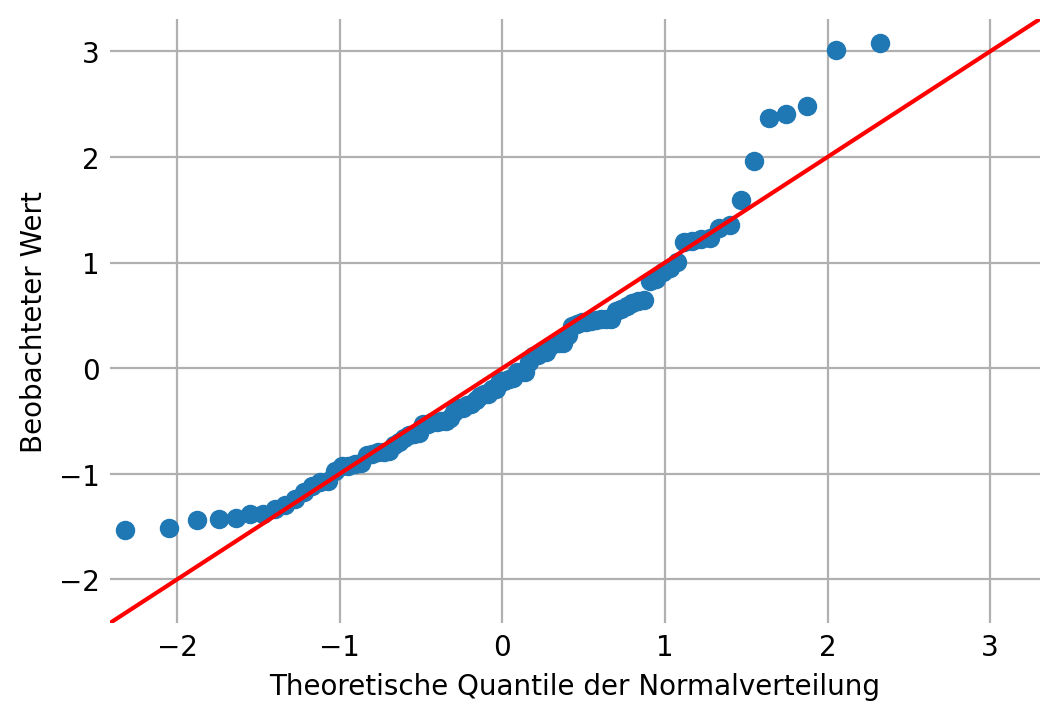

In [598]:
# fig, ax = plt.subplots(figsize=(6,4), dpi=200)
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4), dpi=200)
    fig = sm.qqplot(data3, line='45',fit=True)
    
    # display(fig)
    axes = fig.axes
    for ax in axes:
        ax.set(xlabel='Theoretische Quantile der Normalverteilung', ylabel='Beobachteter Wert')
        ax.tick_params(length=0)
        ax.grid( zorder=1)
        for spine in ax.spines.values():
            spine.set_visible(False)

    fig.savefig('quality_check_qq_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 03 Dichtefunktion erstellen

In [599]:
data4 = data3.copy()

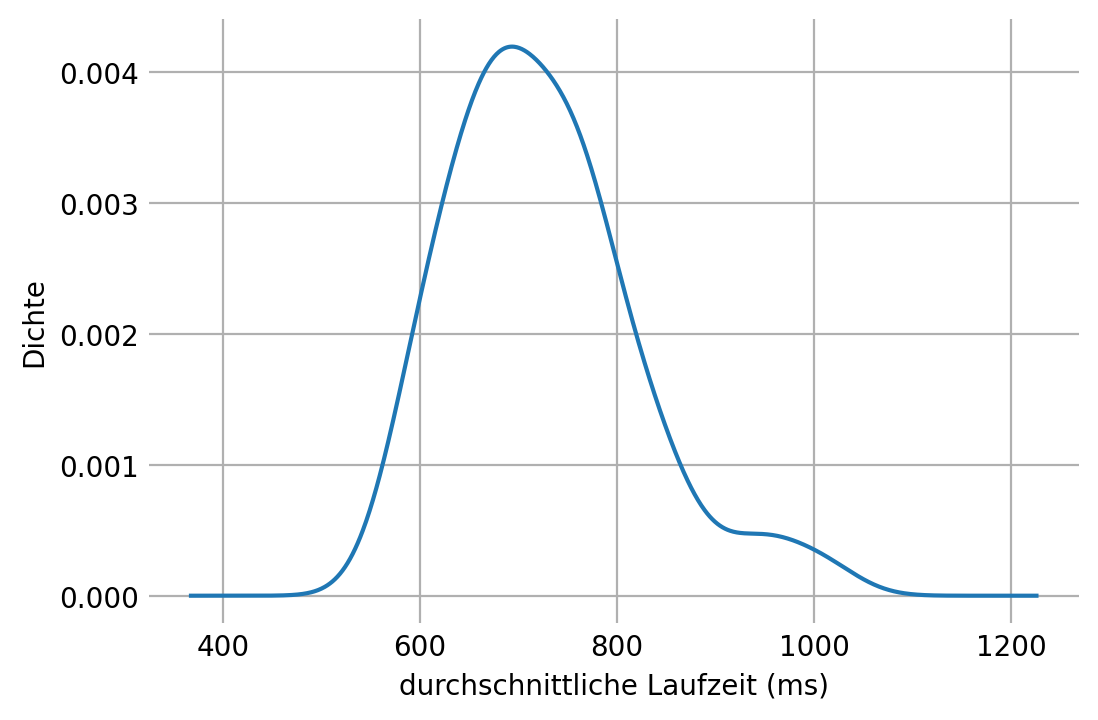

In [600]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax = data4[0].plot(kind='density')
ax.set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Dichte')
ax.tick_params(length=0)
ax.grid( zorder=1)
for spine in ax.spines.values():
    spine.set_visible(False)
fig.savefig('quality_check_density_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 04 Kolmogorow-Smirnow-Test durchführen

In [601]:
from scipy.stats import kstest
print(data4[0].min(), data4[0].max())
data5 = data4.copy()

# Daten zwischen 0 und 1 skalieren
min = data5[0].min()
max = data5[0].max()
data5 = data5.applymap(lambda x: (x - min)/(max-min))
data5[0] = data5[0].astype(float)
print(data5[0].min(), data5[0].max())


582 1011
0.0 1.0


In [602]:
# from numpy.random import seed
# from numpy.random import poisson
# from numpy.random import normal, uniform

# #set seed (e.g. make this example reproducible)
# seed(0)

# #generate dataset of 100 values that follow a Poisson distribution with mean=5
# # data = normal(0,1,5)
# data = uniform(0,1,100)
# pd.DataFrame(data).plot(kind='density')
# pd.DataFrame(data).hist()
# # data = poisson(1,100)
# kstest(data, 'norm')

In [603]:
#perform Kolmogorov-Smirnov test
kstest(data5[0], 'norm')
# KS Test says that there are 2.8101317390639263e-188% chances the two samples come from the same distribution.

KstestResult(statistic=0.5, pvalue=3.5177335893767214e-23)